## Product Recommendation: Enhancing Sales Strategies with Market Basket Analysis
By Sushminder Singh

As the internet is becoming more accessible in differents parts of the world, Ecommerce sector is also booming rapidly. All the traditional retails like Walmart is also migrating online. All the major players from walmart to Amazon is increasing there reach to consumers. The competion for better consumer experience and to increase Revenue is also evident among major players. 
Product Recommendation is also one of the vital part of better consumer experience which helps the customers to discover the most relevant items to their interests. And one of the Famous product Recommendation technique is Market Basket Analysis. So Market Basket Analysis is typically Worked in retail scenario. Here we have the details of the transactions or items in the transactions. So based on these past transactions, we suggest the products to our customers.

Market Basket Analysis is a Business Intelligence technique used by retailers to recommend the product to customers based on items that are frequently bought together or placed in the baskets by customers. It studies customers buying patterns and preferences to predict what they will preferred to purchase along with existing items in the cart. Beside Product Recommendation, this technique is used in many other purposes like

1. By sales team for cross selling and upselling.
2. Used to design Store Layouts
3. To design Offers and Promos

Market basket Analysis is a rule based learning, So here rather than learning labels or clustering like in machine learning, or relationships like in regressions, we are trying to learn rules of associations between objects.

#### Problem Statement

To find the association between the products and Promote Cross selling.

#### Dataset Information

Dataset belongs to a UK based online gift company and downloaded from University of California, Irvine ‘s machine learning repository. Customers are mostly into wholesales. Transactions are occurring for 2010 and 2011.

Data Description:

1. InvoiceNo: A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product code. Nominal, a 5-digit integral number uniquely assigned to each distinct product
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Numeric, the day and time when each transaction was generated.
6. UnitPrice: Numeric, Product price per unit in sterling.
7. CustomerID: Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Nominal, the name of the country where each customer resides.
9. Amount

## Exploratory Data Analysis

Here we import all the functionality of numpy, pandas, matplotlib, datetime in our jupyter notebook.

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [350]:
#read the 2010 csv file
df10 = pd.read_csv('online2010.csv',encoding= 'unicode_escape') 

In [351]:
#to know how our csv file or dataset looks
df10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [352]:
#to know the shape of online2010 dataset, we have 525461 rows in our dataset and 8 columns
df10.shape

(525461, 8)

In [353]:
#here we read the 2011 dataset
df11 = pd.read_csv('online2011.csv',encoding= 'unicode_escape')

In [354]:
#online 2011 dataset contains 541910 rows and 8 columns
df11.shape

(541910, 8)

In [355]:
df11.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [356]:
# info functions tells about the datatype of our features and the no of rows and null values in rows
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Lets join the online 2010 and 2011 dataset with concatenate function

In [357]:
df = pd.concat([df10, df11]).reset_index(drop=True)

In [358]:
# now the shape is increased to 1067371 with 8 coloumns
df.shape

(1067371, 8)

In [359]:
#from Decribe function we can generate descriptive statistics
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Price of the cheapest item is 1.25 pounds and the costliest item is 38790 pounds
price of 75% of the items are below 4.15 pounds

So, As in the description it says that minimun quantity is -8.099500e+04 and the maximum is also the same, only difference is the minimum is in negative and the maximum is positive, it indicates that the quanitity is cancelled. lets check for this:

In [360]:
df[df['Quantity'] ==-8.099500e+04]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


The Invoice number C581484 contains the 'C' value, which means this product "PAPER CRAFT , LITTLE BIRDIE" is cancelled by customer, Now lets check the total number of Cancelled Products

### Cancelled Items

It is Mentioned in the description of Dataset that all the Invoices with 'C' in front is cancelled items. so the total number of cancelled items are 19494, which 15% of all the transaction. So which quite a large in numbers.

In [361]:
df_cancelled = df[df['Invoice'].str.contains('C')]

In [362]:
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia


In [363]:
df_cancelled[df_cancelled['Quantity']>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2/1/2010 8:24,373.57,NaN,United Kingdom


That was not expected but In this transaction the Description is Manual and Stockcode is M and it seems that is was not a product, which means this cancelled order is not an order but done manually maybe for training purpose or by mistake.

In [364]:
print(f'Total number of cancelled Items are {len(df_cancelled)}')

Total number of cancelled Items are 19494


In [365]:
Cancelled_orders = df_cancelled['Invoice'].nunique()
total_orders = df['Invoice'].nunique()
print(f'Percentage of Total number of cancelled Items are {Cancelled_orders/total_orders*100}')

Percentage of Total number of cancelled Items are 15.46207205191318


### Amount

Here we are add an feature to the dataset which tells us about the sales or amount of transactions. we take all the non-cancelled items and multiply the price and quantity row to get the amount. 

In [366]:
df = df[df['Quantity']>0]

In [367]:
df['Amount'] = df['Price']*df['Quantity']

In [368]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0


### Null Values and Dublicated values

Here we remove all the null values and dublicated values from our data

In [369]:
df.isna().mean() #this tells about the mean of null values

Invoice        0.000000
StockCode      0.000000
Description    0.001621
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.228644
Country        0.000000
Amount         0.000000
dtype: float64

The NA customer is in large number, close to 23%. Removing them will make an impact on results. We can remove the NA from the Description column which is in small number. but Here we remove all the nulls and NA because our dataset is quite large.

In [370]:
df.dropna(inplace = True, axis =0) #this drops all the null values

In [371]:
df.isna().mean() #this is again to check for the null values

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
Amount         0.0
dtype: float64

In [372]:
df.nunique() #to know about the total number of unique values in each column

Invoice        36975
StockCode       4631
Description     5283
Quantity         438
InvoiceDate    34591
Price            666
Customer ID     5881
Country           41
Amount          3920
dtype: int64

In [373]:
df['Customer ID'] = df['Customer ID'].astype('str') #changing the datatype of Customer ID to object

In [374]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #changing the format of Invoice date column to datetime64

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  object        
 7   Country      805620 non-null  object        
 8   Amount       805620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 61.5+ MB


In [376]:
df.duplicated() #this tells us about the dublicated rows

0          False
1          False
2          False
3          False
4          False
           ...  
1067366    False
1067367    False
1067368    False
1067369    False
1067370    False
Length: 805620, dtype: bool

In [377]:
df = df.drop_duplicates() #this drops all the dublicated rows

In [378]:
#this tells us about the number of transactions in each country. the highest transactions is in UK followed by germany.
df['Country'].value_counts() 

United Kingdom          700434
Germany                  16440
EIRE                     15567
France                   13512
Netherlands               5090
Spain                     3663
Belgium                   3056
Switzerland               3006
Portugal                  2356
Australia                 1792
Channel Islands           1551
Italy                     1442
Sweden                    1317
Norway                    1290
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Greece                     657
Unspecified                518
Poland                     504
Japan                      468
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     319
Malta                      282
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [379]:
df.shape #the shape of our dataset after cleaing is 779495 rows with 9 columns

(779495, 9)

In [380]:
df['StockCode'].value_counts()

85123A    5023
22423     3337
85099B    3296
84879     2692
20725     2609
          ... 
15059A       1
85171        1
20822        1
84387A       1
16169A       1
Name: StockCode, Length: 4631, dtype: int64

#### 80/20 Rules in Business says that 80% of revenue comes from 20% of our customers. 

So it is important to know about your potential customers. The customers with ID number '17841' and '14911' is contributing to the highest number of transaction which 12435 and 11079 respectively.

But the Customers contributing to the highest number of 'Amount' are Customer ID's 18102 and 14646.

Customer with ID number '14646' is also the one who purchasd highest number of quantity

In [381]:
df['Customer ID'].value_counts() #to know the total number of transactions

17841.0    12435
14911.0    11079
12748.0     6587
14606.0     6359
14096.0     5111
           ...  
13366.0        1
16093.0        1
13864.0        1
12404.0        1
15913.0        1
Name: Customer ID, Length: 5881, dtype: int64

In [382]:
#to know the top 10 cutomers with highest amount purchased
df['Amount'].groupby(df['Customer ID']).sum().sort_values(ascending = False).head(10) 

Customer ID
18102.0    580987.04
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16446.0    168472.50
16684.0    147142.77
12415.0    144458.37
Name: Amount, dtype: float64

In [383]:
#to know the top 10 customers with highest quantity purchased
df['Quantity'].groupby(df['Customer ID']).sum().sort_values(ascending = False).head(10)

Customer ID
14646.0    367833
13902.0    220600
13694.0    188201
18102.0    181645
14156.0    164325
14911.0    148222
17511.0    117174
16684.0    104810
14298.0    100272
12415.0     91743
Name: Quantity, dtype: int64

##### Some of the insights: 

Total Number of Unique Customer: 5880

Total Number of Unique Products: 4630

Customers Ordered from 41 different countries

### Top 20 StockCode with highest number of Quantity are listed below.

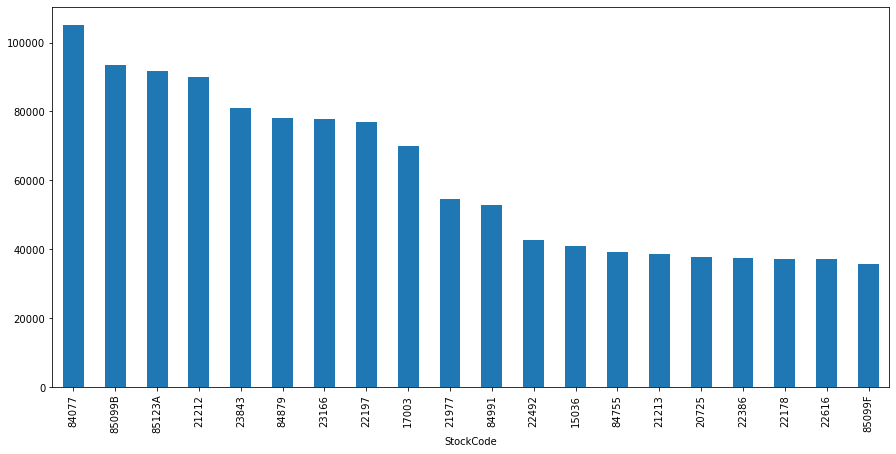

In [384]:
df['Quantity'].groupby(df['StockCode']).sum().sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

In [385]:
display(df[df['StockCode'].isin(['84077'])]['Description'].unique())

array(['WORLD WAR 2 GLIDERS ASSTD DESIGNS'], dtype=object)

From the analysis, we find that the product with the stockcode '84077' is the most popular item.The name of the product is 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'. This product is sold for more than 100000 times which is highest quantity among all other products.

### Top 20 StockCode or Products with highest number of Amount are listed below

Here we remove the Postage from the stockcode which doesn't make any sense.

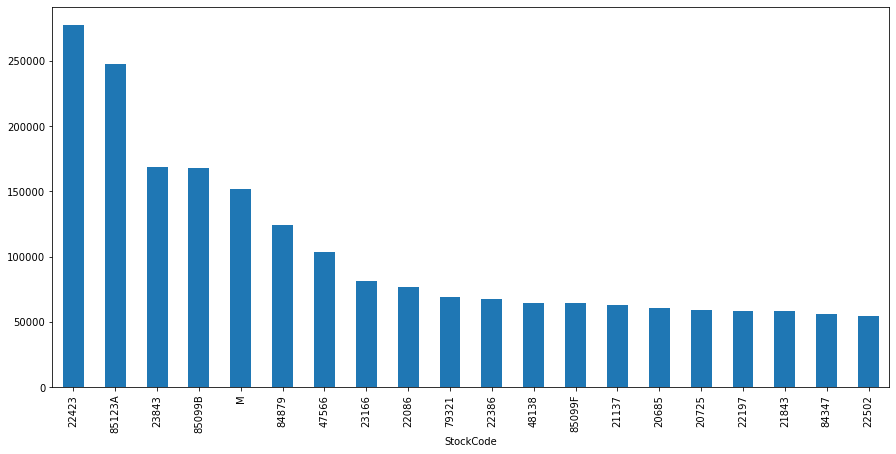

In [386]:
df = df[df.StockCode != 'POST']
df['Amount'].groupby(df['StockCode']).sum().sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

In [387]:
display(df[df['StockCode'].isin(['85123A'])]['Description'].unique())

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

From the Above plot, we find that the product with the stockcode '22423' is the item with highest number of sales.The name of the product is 'REGENCY CAKESTAND 3 TIER'. The total sale for this product is more than 250000 pound, which is highest among all the products. The second highest product with most sales is WHITE HANGING HEART T-LIGHT HOLDER. 

### TOP 10 countries with highest number of Quantity sold

It is a UK based company and the highest number of quantity is also sold in UK which is 8545869. Also the total percentage of Quantity sold in UK is 81.20% of all the quantity.Outside UK the highest quantity sold is in Netherland.

In [388]:
total = df['Quantity'].sum()
Uk_Quantity = df['Quantity'].groupby(df['Country']).sum().sort_values(ascending = False).head(1)
percentage_of_quantity_for_UK = Uk_Quantity/total*100
percentage_of_quantity_for_UK

Country
United Kingdom    81.20771
Name: Quantity, dtype: float64

In [389]:
#how much quantity of product sold in each country outside UK

a = df['Quantity'].groupby(df['Country']).sum().sort_values(ascending = False)[1:].head(10)

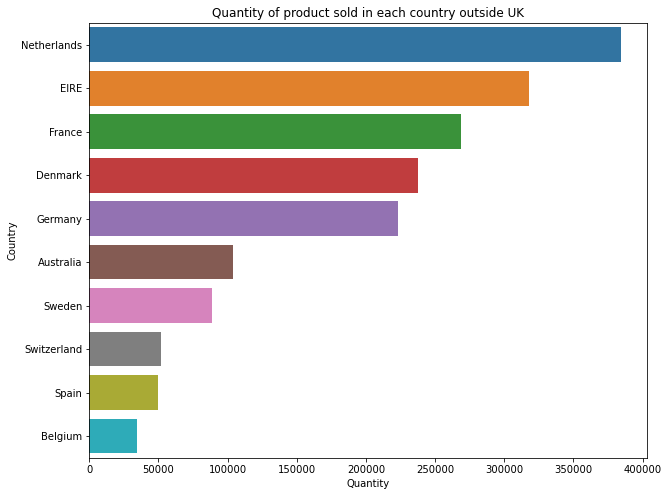

In [390]:
plt.figure(figsize=(10,8))
sns.barplot(x= a.values, y= a.index)
plt.title("Quantity of product sold in each country outside UK")
plt.xlabel("Quantity")
plt.show()

### TOP 10 countries with highest number of Sales

It is obvious that the highest number of sales is in UK which is 14379920 pound which is 83% of the all the sales. Next highest sales are from EIRE.

In [391]:
total = df['Amount'].sum()
Uk_Quantity = df['Amount'].groupby(df['Country']).sum().sort_values(ascending = False).head(1)
percentage_of_quantity_for_UK = Uk_Quantity/total*100
percentage_of_quantity_for_UK

Country
United Kingdom    83.361127
Name: Amount, dtype: float64

In [392]:
b = df['Amount'].groupby(df['Country']).sum().sort_values(ascending = False)[1:].head(10)

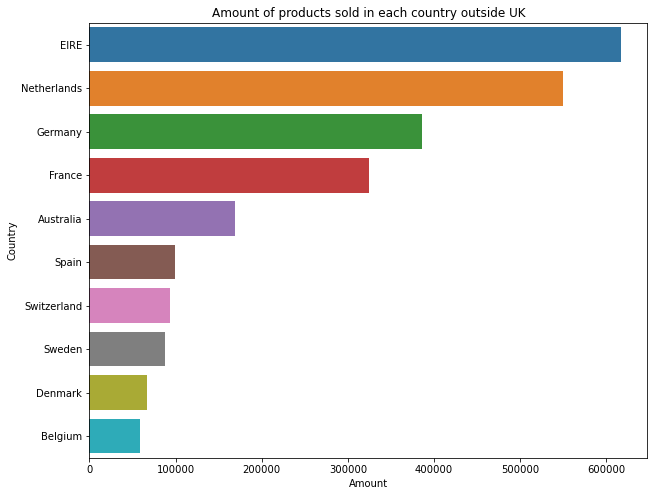

In [393]:
plt.figure(figsize=(10,8))
sns.barplot(x= b.values, y= b.index)
plt.title("Amount of products sold in each country outside UK")
plt.xlabel("Amount")
plt.show()

So here we notice that the quantity and amount purchased is different outside UK, the Highest Amount sold outside UK is in EIRE and the highest quantity sold outside UK is in Netherland. Below the list of top countries with lowest sales. Nigeria is the country with lowest sales of 140 pounds only.


In [394]:
df['Amount'].groupby(df['Country']).sum().sort_values(ascending= False).tail(10)

Country
RSA                   1933.74
Lebanon               1693.88
Brazil                1411.87
Bahrain               1354.37
European Community    1159.25
Korea                 1118.51
Czech Republic         786.74
West Indies            536.41
Saudi Arabia           145.92
Nigeria                140.39
Name: Amount, dtype: float64

## Market Basket Analysis

As discussed earlier that in Market Basket Analysis we check for the items in Transactions, So in this Dataset Our transactions are 'Invoices' column and Product names are 'StockCode' column. I am not taking the 'Description' column because it was lengthy and the names of products are not fit in columns and also they are descriptions of the product not the product name.

So here all Invoices are one set of baskets that the customer buys from the company.

So to start with Market Basket Analysis, we install the mlxtend package in our enviorment. Enter the follwing command in Anaconda Prompt

###### "conda install -c conda-forge mlxtend"

Mlxtend also called machine learning extensions is a Python library of useful tools for the day-to-day data science tasks. Now import the apriori algorithm and association rules from MLxtend.

In [425]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

From MLXTEND, we have preprocessing, models which we fit and transform on our Stockcode column and Invoice Column. this create a list of baskets.
Here i define a function using transaction encoder, so that i can perform separately it on required countries. Just enter the country and we get the basket of all transactions of that country.

In [401]:
# Create our list of 'baskets' for use with the TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
def enter_country(country_name):
    basket = df[df['Country'] == country_name]
    basket_series = basket.groupby('Invoice').apply(lambda x: list(x['StockCode']))
    te = TransactionEncoder()
    transaction_matrix = te.fit(basket_series).transform(basket_series, sparse=True)
    transaction_df = pd.DataFrame.sparse.from_spmatrix(transaction_matrix, columns=te.columns_)
    return(transaction_df)

In [426]:
#list of basket for Germany
df_germany = enter_country('Germany')
df_germany 

,10002,10125,10135,11001,15034,15036,15039,15044A,15044B,15044D,...,90200E,90201A,90201B,90201C,90201D,90202D,90204,ADJUST,M,PADS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
761,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In market Basket Analysis, 3 important terms from which we decide the association rules are Support, Confidence and Lift

Support is how many times an item or itemset occurs in the dataset. Here X union Y is set of two itemsets contain X and Y.


$$  \text{support}(X \cup Y) = \frac{\text{No of transactions with X and Y together}}{\text{total number of transactions}} $$


Confidence is how likely an Item Y is purchased when Item X is purchased.

$$ \text{confidence}(X\rightarrow Y) = \frac{\text{support}(X\cup Y)}{\text{support}(X)} = \frac{\text{proportion of transactions with X and Y}}{\text{proportion of transactions with X}}$$

Lift measures a similar idea as confidence, How much we have lifted the purchase of the consequence by the fact of the antecedent. A values of 1 is no increase. Lift: Basically tells abo.ut the strength of any rule, more lift more strength

$$ \text{lift}(X\rightarrow Y) = \frac{\text{confidence}(X\rightarrow Y)}{\text{support}(Y)} = \frac{\frac{\text{support}(X\cup Y)}{\text{support}(X)}}{\text{support}(Y)} = \frac{\text{support}(X\cup Y)}{\text{support}(X)\times\text{support}(Y)}$$

When we apply the apriori algorithm and association rules on our germany's list of baskets, we get all the associated rules for germany. Here i have taken the Support of 0.02 which means that rules with all the itemsets occurs 2% times in dataset and the min_threshold of 1.2. Reason for applying Apriori Algorithm on different countries separately because it is Computationally expensive.

In [427]:
germany_frequent_itemsets = apriori(df_germany, min_support =0.02,use_colnames = True)
germany_rule = association_rules(germany_frequent_itemsets, metric ='lift', min_threshold = 1.2)
germany_rule.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
648,(23290),(23292),0.024837,0.026144,0.022222,0.894737,34.223684,0.021573,9.251634
649,(23292),(23290),0.026144,0.024837,0.022222,0.850000,34.223684,0.021573,6.501089
1939,"(21240, 20677, 21239)","(21238, 21243)",0.027451,0.027451,0.020915,0.761905,27.755102,0.020161,4.084706
1946,"(21238, 21243)","(21240, 20677, 21239)",0.027451,0.027451,0.020915,0.761905,27.755102,0.020161,4.084706
647,(23256),(23254),0.028758,0.030065,0.023529,0.818182,27.213439,0.022665,5.334641
646,(23254),(23256),0.030065,0.028758,0.023529,0.782609,27.213439,0.022665,4.467712
1948,"(20677, 21239)","(21238, 21240, 21243)",0.032680,0.023529,0.020915,0.640000,27.200000,0.020146,2.712418
1783,"(20677, 21239)","(21243, 21244)",0.032680,0.023529,0.020915,0.640000,27.200000,0.020146,2.712418
1937,"(21238, 21240, 21243)","(20677, 21239)",0.023529,0.032680,0.020915,0.888889,27.200000,0.020146,8.705882
1778,"(21243, 21244)","(20677, 21239)",0.023529,0.032680,0.020915,0.888889,27.200000,0.020146,8.705882


In [430]:
#to know the description of the product, we use the following expression.
df[df['StockCode'].isin(['23290'])]['Description'].unique()

array(['SPACEBOY CHILDRENS BOWL'], dtype=object)

In [431]:
df[df['StockCode'].isin(['21240','21239','20677','21243','21238'])]['Description'].unique()

array(['PINK SPOTTY BOWL', 'RED SPOTTY CUP', 'BLUE  SPOTTY CUP',
       'PINK  SPOTTY CUP', 'PINK  SPOTTY PLATE ', 'PINK  POLKADOT PLATE ',
       'BLUE POLKADOT CUP', 'PINK  POLKADOT CUP', 'PINK POLKADOT BOWL',
       'RED RETROSPOT CUP', 'PINK POLKADOT PLATE '], dtype=object)

According to the results, German wholesalers who purchase item "SPACE BOY CHILDRENS CUP" is 34 times more likely to buy item "SPACEBOY CHILDRENS BOWL" than an average cutomer. So we can recommend the "SPACE BOY CHILDRENS CUP" to those who purchase the item "SPACEBOY CHILDRENS BOWL".

##### EIRE or Ireland is the country with highest amount of sales outside UK, So lets check the Association Rules for EIRE

Here for EIRE, i ahve taken min_support of 0.02 and Min_threshold of 1.2.

In [407]:
df_EIRE = enter_country('EIRE')
EIRE_frequent_itemsets = apriori(df_EIRE, min_support =0.02,use_colnames = True)
EIRE_rule = association_rules(EIRE_frequent_itemsets, metric ='lift', min_threshold = 1.2)
EIRE_rule.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2068,"(22698, 23171)","(22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2526,"(22699, 22698, 23171)","(22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2053,"(22423, 23172, 22697)","(22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2551,"(22698, 23171)","(22699, 22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2506,"(22699, 22423, 23172, 22697)","(22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2531,"(22423, 23172, 22697)","(22699, 22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2220,"(22698, 23171)","(22699, 22423, 23172)",0.024691,0.024691,0.022928,0.928571,37.607143,0.022318,13.654321
2201,"(22699, 22423, 23172)","(22698, 23171)",0.024691,0.024691,0.022928,0.928571,37.607143,0.022318,13.654321
1624,"(22698, 23171)","(23172, 22697)",0.024691,0.022928,0.021164,0.857143,37.384615,0.020598,6.839506
2586,"(22699, 23172, 23171)","(22423, 22698, 23170)",0.024691,0.022928,0.021164,0.857143,37.384615,0.020598,6.839506


lets Filter the itemsets with confidence more than 80% and lift above 30.

In [433]:
EIRE_rule[(EIRE_rule['confidence']>0.8)&(EIRE_rule['lift']>30)].sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2531,"(22423, 23172, 22697)","(22699, 22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2053,"(22423, 23172, 22697)","(22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2506,"(22699, 22423, 23172, 22697)","(22698, 23171)",0.021164,0.024691,0.021164,1.000000,40.500000,0.020641,inf
2526,"(22699, 22698, 23171)","(22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2068,"(22698, 23171)","(22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2551,"(22698, 23171)","(22699, 22423, 23172, 22697)",0.024691,0.021164,0.021164,0.857143,40.500000,0.020641,6.851852
2220,"(22698, 23171)","(22699, 22423, 23172)",0.024691,0.024691,0.022928,0.928571,37.607143,0.022318,13.654321
2201,"(22699, 22423, 23172)","(22698, 23171)",0.024691,0.024691,0.022928,0.928571,37.607143,0.022318,13.654321
2525,"(22699, 23172, 22697)","(22423, 22698, 23171)",0.022928,0.024691,0.021164,0.923077,37.384615,0.020598,12.679012
2054,"(22423, 22698, 23171)","(23172, 22697)",0.024691,0.022928,0.021164,0.857143,37.384615,0.020598,6.839506


In [435]:
df[df['StockCode'].isin(['22423','23172','22697'])]['Description'].unique()

array(['REGENCY CAKESTAND 3 TIER', 'GREEN REGENCY TEACUP AND SAUCER',
       'TEACUP AND SAUCER REGENCY GREEN', 'REGENCY TEA PLATE PINK'],
      dtype=object)

In [437]:
df[df['StockCode'].isin(['22699','22698','23171'])]['Description'].unique()

array(['ROSES REGENCY TEACUP AND SAUCER ',
       'PINK REGENCY TEACUP AND SAUCER', 'TEACUP AND SAUCER REGENCY PINK',
       'TEACUP AND SAUCER REGENCY ROSES', 'REGENCY TEA PLATE GREEN '],
      dtype=object)

IF customer's basket is fill with products with stockcode - 22423, 23172 and 22697 than the rules are 100% confident that the customer will purchase the products with stockcode 22699, 22698 and 23171.

Description of the products are follows:  

If wholesaler purchase "REGENCY CAKESTAND 3 TIER", "REGENCY TEA PLATE PINK" and "GREEN REGENCY TEACUP AND SAUCER"

than according to rules we are 100% confidence that the Wholesaler will purchase "ROSES REGENCY TEACUP AND SAUCER", "PINK REGENCY TEACUP AND SAUCER" and "REGENCY TEA PLATE GREEN"


#### Association Rules for United Kingdom

Our main target in this project is UK because it the country with most transaction and 83% of all sales are from UK, So lets find out about the association rules for UK. For UK, lets take the minimum support of 0.15 and threshold of 1.2

In [443]:
df_uk = enter_country('United Kingdom')
UK_frequent_itemsets = apriori(df_uk, min_support =0.015,use_colnames = True)
UK_rule = association_rules(UK_frequent_itemsets, metric ='lift', min_threshold = 1.2)
UK_rule.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
125,(22697),(22698),0.025025,0.019954,0.016643,0.665077,33.330422,0.016144,2.926187
124,(22698),(22697),0.019954,0.025025,0.016643,0.834081,33.330422,0.016144,5.876203
150,(84997D),(84997C),0.024309,0.021833,0.015331,0.630675,28.886114,0.014800,2.648525
151,(84997C),(84997D),0.021833,0.024309,0.015331,0.702186,28.886114,0.014800,3.276174
144,(82581),(82580),0.021087,0.026695,0.016226,0.769448,28.823794,0.015663,4.221636
...,...,...,...,...,...,...,...,...,...
147,(85123A),(84879),0.140424,0.074686,0.018552,0.132116,1.768945,0.008064,1.066172
21,(20725),(85123A),0.068124,0.140424,0.015033,0.220665,1.571421,0.005466,1.102961
20,(85123A),(20725),0.140424,0.068124,0.015033,0.107052,1.571421,0.005466,1.043594
156,(85123A),(85099B),0.140424,0.089063,0.016822,0.119796,1.345078,0.004316,1.034916


In [446]:
#lets filterout only itemsets with confidence of 80% and lift more than 30
UK_rule[(UK_rule['confidence']>0.8)&(UK_rule['lift']>30)].sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,(22698),(22697),0.019954,0.025025,0.016643,0.834081,33.330422,0.016144,5.876203


On Minimum support of 0.15 and Threshold of 1.2 we get 164 rules, out of these 164 rules we have only 1 rule with more 80% of confidence and lift 33.33.
If Wholesaler is purchasing "SAUCER PINK REGENCY TEACUP" than we can recommend "GREEN REGENCY TEACUP" because it has 80% of confidence with 33 times lift.

In [447]:
df[df['StockCode'].isin(['22697'])]['Description'].unique()

array(['GREEN REGENCY TEACUP AND SAUCER',
       'TEACUP AND SAUCER REGENCY GREEN'], dtype=object)

For more rules, we can set the min_support to 0.1 and minimum threshold of 1.2, but this will decrease the confidence among itemsets. Now on Support of 0.1 we have 816 rules.

In [449]:
df_uk = enter_country('United Kingdom')
UK_frequent_itemsets = apriori(df_uk, min_support =0.01,use_colnames = True)
UK_rule = association_rules(UK_frequent_itemsets, metric ='lift', min_threshold = 1.2)
UK_rule.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
411,(22748),(22746),0.015838,0.011722,0.010469,0.661017,56.391642,0.010284,2.915420
410,(22746),(22748),0.011722,0.015838,0.010469,0.893130,56.391642,0.010284,9.208945
408,(22748),(22745),0.015838,0.014078,0.012020,0.758945,53.909241,0.011797,4.090035
409,(22745),(22748),0.014078,0.015838,0.012020,0.853814,53.909241,0.011797,6.732239
127,(21086),(21094),0.013064,0.015241,0.010111,0.773973,50.780782,0.009912,4.356811
...,...,...,...,...,...,...,...,...,...
310,(85123A),(22382),0.140424,0.051302,0.010529,0.074979,1.461519,0.003325,1.025596
170,(85123A),(21212),0.140424,0.063054,0.012229,0.087086,1.381138,0.003375,1.026325
171,(21212),(85123A),0.063054,0.140424,0.012229,0.193945,1.381138,0.003375,1.066399
498,(85123A),(85099B),0.140424,0.089063,0.016822,0.119796,1.345078,0.004316,1.034916


## Recommender Systems
I design a recommender system for UK based wholesalers. Now we have our rules for UK Based customers , So we can start to recommend items to customers. If we have the current basket, we can check our association rules for the next most common item, based on highest lift. Here i design a recommender system which recommend the product based on association rules.

In [452]:
UK_rule['antecedents'] = UK_rule['antecedents'].apply(lambda x:list(x)).copy()
UK_rule['consequents'] = UK_rule['consequents'].apply(lambda x:list(x)).copy()

In [457]:
import numpy as np

metric = 'lift'

def product_recs(basket, UK_rule, metric):
    
    # Randomly select an item from the basket
    random_item = input(np.random.choice(basket, 1)[0])
    print(random_item)
    
    # Find rules where the item is in the antecedent
    rule_filter = UK_rule['antecedents'].apply(lambda x:x[0]) == random_item
    
    # Filter the dataframe using rule_filter and sort by the selected metric
    filtered_df = UK_rule[rule_filter].sort_values(by=metric)
    
    # Randomly return one of the top 20 items from the filtered dataframe
    reco = filtered_df.head(20).sample(1)['consequents']
    
    return reco

mybasket = ['basket']
product_recs(mybasket, UK_rule, metric)

basket22748
22748


411    [22746]
Name: consequents, dtype: object

In [458]:
display(df[df['StockCode'].isin(['22746','22748'])]['Description'].unique())

array(["POPPY'S PLAYHOUSE LIVINGROOM ", "POPPY'S PLAYHOUSE KITCHEN"],
      dtype=object)

## Conclusion:

1. The Company should suggest the frequently bought together products to there wholesale customers and they can provide deals or offers to increase sales.
2. If customers are purchasing the products present in list of antecedents than we can suggest the consequents from the Association Rules table with lift greater than 1.
3. As we know that Our customers are wholesalers, so most of the items recommended are related to each other in terms of Common Baskets. Example: POPPY'S PLAYHOUSE LIVINGROOM is recommended with POPPY'S PLAYHOUSE KITCHEN. Also many of the recommended products are similar to the purchasing product, only difference is color or the shape of the product. The reason is the wholesalers want more varieties of same product for there end customers.
4. We find that the product with the stockcode '22423' is the item with highest number of sales.The description of the product is 'REGENCY CAKESTAND 3 TIER' follwed by Product with stockcode '85123A'.
5. So for UK based cutomers, If they are purchasing item 'REGENCY CAKESTAND 3 TIER' which is the item with highest number of sales, we can recommend the ROSES REGENCY TEACUP AND SAUCER and 'GREEN REGENCY TEACUP AND SAUCER' to our customers for cross-selling. 
6. For UK based Wholesalers, If they purchasing "SAUCER PINK REGENCY TEACUP" than "GREEN REGENCY TEACUP" is highly recommended.
7. In terms of Quantity, stockcode '84077' is the most popular item.The name of the product is 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'. This product is sold for more than 100000 times which is highest quantity among all other categories. for UK based customers our association rule is not suggesting anything with this product.
8. In terms of highest number transactions Germany is on top outside UK, In terms of sales Highest Amount sold outside UK is in EIRE and In terms of Quantity the highest quantity sold outside UK is in Netherland.